In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os
df=pd.read_csv ('train.csv')
df.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [2]:
from datetime import datetime
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix,mean_squared_error,accuracy_score
from sklearn.metrics import precision_score,recall_score,roc_auc_score,f1_score,cohen_kappa_score
from sklearn.utils import resample
from pprint import pprint

import plotly as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns
import math
from IPython.display import Markdown, display
import statsmodels.api as sm # import API
from matplotlib.pyplot import xticks

In [3]:
df.shape

(595212, 59)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   595212 non-null  int64  
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595212 non-null  int64  
 6   ps_ind_05_cat   595212 non-null  int64  
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 non-null  int64  
 17  ps_ind_16_

In [17]:
df1 = pd.DataFrame(columns=['variable','role', 'level', 'keep', 'dtype','uvc'])
emp_list =[]
for columns in df.columns:
     
    if columns == 'id':
        role = 'id'
    elif columns == 'target':
        role = 'target'
    else:
        role = 'input'   
       
    dtype = df[columns].dtype   
    
    Unique_Values_Count = pd.DataFrame(df.nunique().astype(int),columns=['uvc'])
    
    keep = True   
    
    if columns[-3:] == 'bin' or columns == 'target':
        level = 'binary'
    elif columns[-3:] == 'cat' or columns == 'id':
        level = 'categorical' 
    elif df[columns].dtype == float:
        level = 'interval'
    elif df[columns].dtype == np.int64:
        level = 'ordinal'
        
    
    f_dict = {
        'variable' : columns,
        'role': role,
        'level': level,
        'keep': keep,
        'dtype': dtype,
            }
    
    emp_list.append(f_dict)

df1 = df1.append(emp_list)

print(df1)

          variable    role        level  keep    dtype  uvc
0               id      id  categorical  True    int64  NaN
1           target  target       binary  True    int64  NaN
2        ps_ind_01   input      ordinal  True    int64  NaN
3    ps_ind_02_cat   input  categorical  True    int64  NaN
4        ps_ind_03   input      ordinal  True    int64  NaN
5    ps_ind_04_cat   input  categorical  True    int64  NaN
6    ps_ind_05_cat   input  categorical  True    int64  NaN
7    ps_ind_06_bin   input       binary  True    int64  NaN
8    ps_ind_07_bin   input       binary  True    int64  NaN
9    ps_ind_08_bin   input       binary  True    int64  NaN
10   ps_ind_09_bin   input       binary  True    int64  NaN
11   ps_ind_10_bin   input       binary  True    int64  NaN
12   ps_ind_11_bin   input       binary  True    int64  NaN
13   ps_ind_12_bin   input       binary  True    int64  NaN
14   ps_ind_13_bin   input       binary  True    int64  NaN
15       ps_ind_14   input      ordinal 

C:\Users\Admin\AppData\Local\Temp\ipykernel_8160\3445599150.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(emp_list)


In [6]:
df1.groupby('level')[['variable']].count()


,variable
level,
binary,18
categorical,15
interval,10
ordinal,16


In [ ]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df, title="Pandas Profiling Report")
profile.to_file("your_report.html")

Percentge distribution of class '1' & class '0':

 0    96.355248
1     3.644752
Name: target, dtype: float64


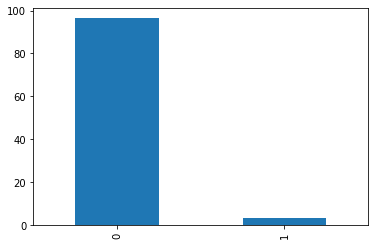

In [7]:
perc = (df['target'].value_counts()/(df.shape[0]))*100
print("Percentge distribution of class '1' & class '0':\n\n",perc)
perc.plot.bar();

In [8]:
df1['level'].value_counts()

binary         18
ordinal        16
categorical    15
interval       10
Name: level, dtype: int64

# 1)3 important inferences from the data
1)Data has 595212 rows and 59 features
2)Data is higly imblaced
3)variable types in data:
    binary         18
    ordinal        16
    categorical    15
    interval       10

# 2) Is the data balanced?
No, data is not balanced as shown in above bar plot.

In [9]:
group_variable_type = df1.groupby('level')
print("categorical features count:",group_variable_type.get_group('categorical').shape[0])

categorical features count: 15


# 3)How many categorical features are there?
15

In [10]:
group_variable_type = df1.groupby('level')
print("binary features count:",group_variable_type.get_group('binary').shape[0])

binary features count: 18


# 4)How many binary features are there?
18

In [11]:
for variable in df1.variable:
    IntervalVar = df1[df1.level=='interval']['variable']
    CategoricalVar = df1[df1.level=='categorical']['variable']
    BinaryVar = df1[df1.level=='binary']['variable']
    OrdinalVar = df1[df1.level=='ordinal']['variable']
print(len(IntervalVar))

10


<AxesSubplot:>

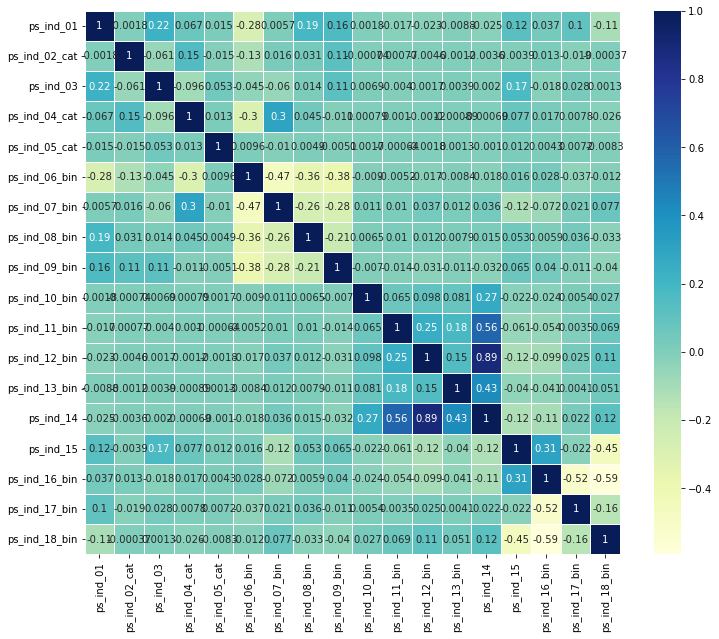

In [13]:
ind_col = [w for w in df.columns if 'ind' in w]
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(df[ind_col].corr(),linewidths=.5, cmap="YlGnBu",ax=ax, annot= True)

In [15]:
mean=pd.DataFrame(df[ind_col].mean())
std_dev=pd.DataFrame(df[ind_col].std())
cent_df=pd.concat([mean, std_dev], axis=1)
print(cent_df)

                      0         0
ps_ind_01      1.900378  1.983789
ps_ind_02_cat  1.358943  0.664594
ps_ind_03      4.423318  2.699902
ps_ind_04_cat  0.416794  0.493311
ps_ind_05_cat  0.405188  1.350642
ps_ind_06_bin  0.393742  0.488579
ps_ind_07_bin  0.257033  0.436998
ps_ind_08_bin  0.163921  0.370205
ps_ind_09_bin  0.185304  0.388544
ps_ind_10_bin  0.000373  0.019309
ps_ind_11_bin  0.001692  0.041097
ps_ind_12_bin  0.009439  0.096693
ps_ind_13_bin  0.000948  0.030768
ps_ind_14      0.012451  0.127545
ps_ind_15      7.299922  3.546042
ps_ind_16_bin  0.660823  0.473430
ps_ind_17_bin  0.121081  0.326222
ps_ind_18_bin  0.153446  0.360417


In [18]:
df1['uvc'] = Unique_Values_Count.reset_index()['uvc']
df1

,variable,role,level,keep,dtype,uvc
0,id,id,categorical,True,int64,595212
1,target,target,binary,True,int64,2
2,ps_ind_01,input,ordinal,True,int64,8
3,ps_ind_02_cat,input,categorical,True,int64,5
4,ps_ind_03,input,ordinal,True,int64,12
5,ps_ind_04_cat,input,categorical,True,int64,3
6,ps_ind_05_cat,input,categorical,True,int64,8
7,ps_ind_06_bin,input,binary,True,int64,2
8,ps_ind_07_bin,input,binary,True,int64,2
9,ps_ind_08_bin,input,binary,True,int64,2


# 5)Write inferences from data on interval variables.
ps_ind_15 has the highest mean and standard deviation
Looking at above plot only 3 features are correlated. ps_ind_12_bin is having a high correlation with ps_ind_14 with 0.89.

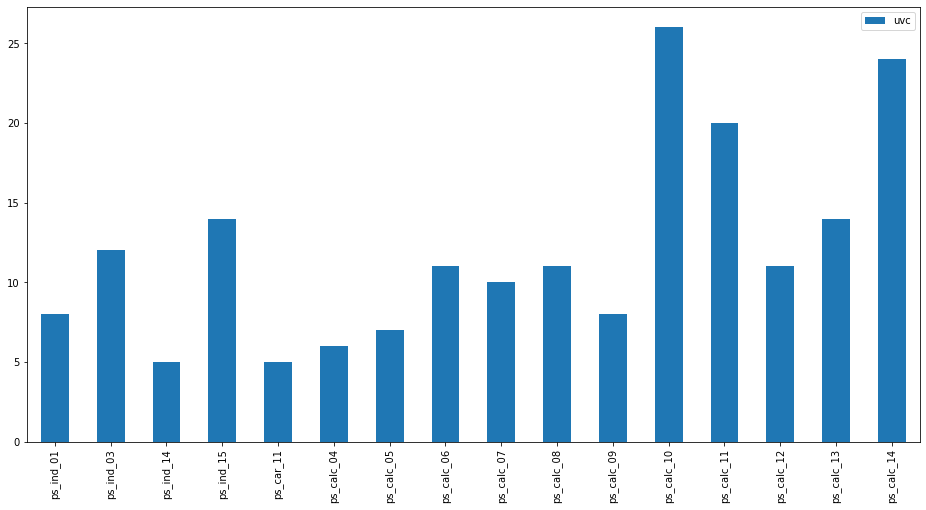

In [19]:
d ={}
for i in df[OrdinalVar].columns:
    d[i] = df[OrdinalVar][i].nunique()

pd.DataFrame(d,index=['uvc']).T.plot.bar(figsize=(16,8));

# 6) Write inferences from data on ordinal variables. 
Very few ordinal variables are correlated to each other
Looking at above graph only 2 features have unqiue values more than 20

<AxesSubplot:>

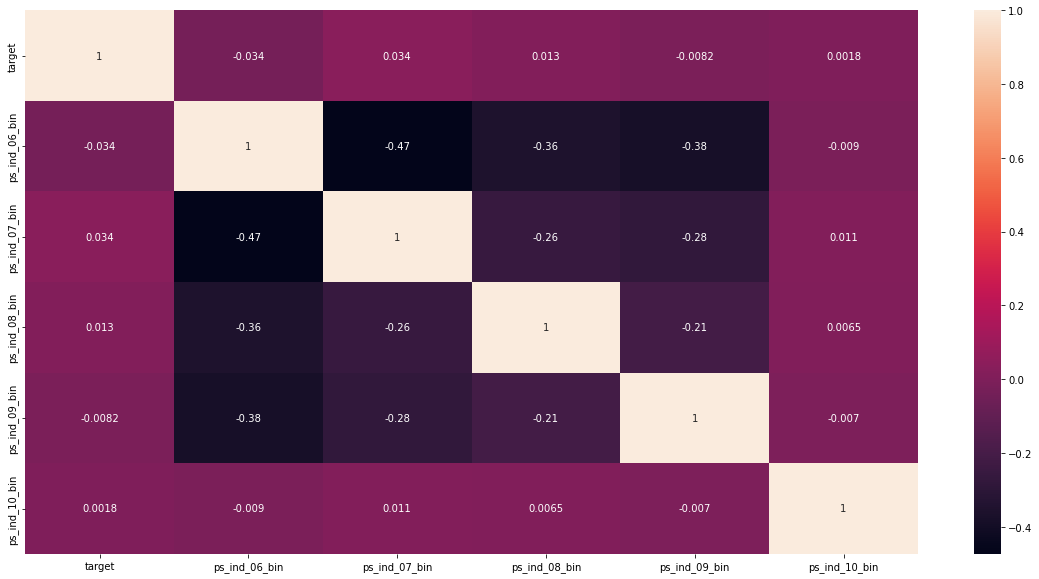

In [20]:
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(df.loc[:, ["target", "ps_ind_06_bin","ps_ind_07_bin", "ps_ind_08_bin", "ps_ind_09_bin","ps_ind_10_bin"] ].corr(), annot=True)

# 7. Write inferences from data on binary variables. doubt
variables are very less correlated from above plot 

Percentge distribution of class '1' & class '0':

 0    96.355248
1     3.644752
Name: target, dtype: float64


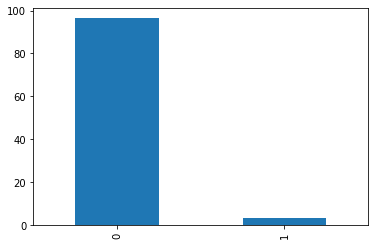

In [21]:
perc = (df['target'].value_counts()/(df.shape[0]))*100
print("Percentge distribution of class '1' & class '0':\n\n",perc)
perc.plot.bar();

# 8)Check if the target data is proportionate or not.
Data is imbalanced.

# 9)What should be the preferred way in this case to balance the data? 
The most popular solution to an imbalanced classification problem is to change the composition of the training dataset.Techniques designed to change the class distribution in the training dataset are generally referred to as sampling methods or resampling methods as we are sampling an existing data sample.

In [22]:
from sklearn.utils import resample
df_mino= df[df['target']==1]
df_majo= df[df['target']==0]
df_mino_upsampled = resample(df_mino,replace=True,n_samples=int(len(df_majo)*0.12), random_state = 42)

print("Size of data, after achieving a balance of 12%: ", df_mino_upsampled.shape[0] + df_majo.shape[0])

Size of data, after achieving a balance of 12%:  642340


# 10)How many training records are there after achieving a balance of 12%?
642340

Class compostion after resampling:
0    573518
1    573518
Name: target, dtype: int64


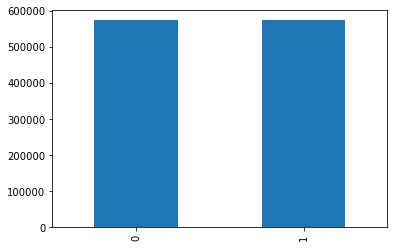

In [23]:
df_mino_upsampled = resample(df_mino,replace=True,n_samples=len(df_majo), random_state = 42)
df = pd.concat([df_majo,df_mino_upsampled])
print("Class compostion after resampling:")
print(df['target'].value_counts())
df['target'].value_counts().plot.bar();

In [9]:
missing = []

for columns in df.columns:
    missing_count = df[df[columns] == -1][columns].count()
    if missing_count > 0:
        missing.append(columns)
        missings_perc = missing_count*100/df.shape[0]
        
        print('Variable %s has %i missing with %f percentage'%(columns, missing_count, missings_perc))
        
print('\nIn total, there are {} variables with missing values'.format(len(missing)))

Variable ps_ind_02_cat has 1234 missing with 0.107582 percentage
Variable ps_ind_04_cat has 924 missing with 0.080555 percentage
Variable ps_ind_05_cat has 18188 missing with 1.585652 percentage
Variable ps_reg_03 has 185917 missing with 16.208471 percentage
Variable ps_car_01_cat has 975 missing with 0.085002 percentage
Variable ps_car_03_cat has 753240 missing with 65.668384 percentage
Variable ps_car_05_cat has 481906 missing with 42.013154 percentage
Variable ps_car_07_cat has 34318 missing with 2.991885 percentage
Variable ps_car_09_cat has 1843 missing with 0.160675 percentage
Variable ps_car_11 has 5 missing with 0.000436 percentage
Variable ps_car_12 has 1 missing with 0.000087 percentage
Variable ps_car_14 has 86344 missing with 7.527575 percentage

In total, there are 12 variables with missing values


# 11) Which are the top two features in terms of missing values?
ps_car_03_cat & ps_car_05_cat are the top 2 features in missing values

# 12) In total, how many features have missing values?
there are 12 variables with missing values

In [7]:
df2=df.drop(['ps_car_03_cat', 'ps_car_05_cat'], axis = 1)
print(df2.shape)

(595212, 57)


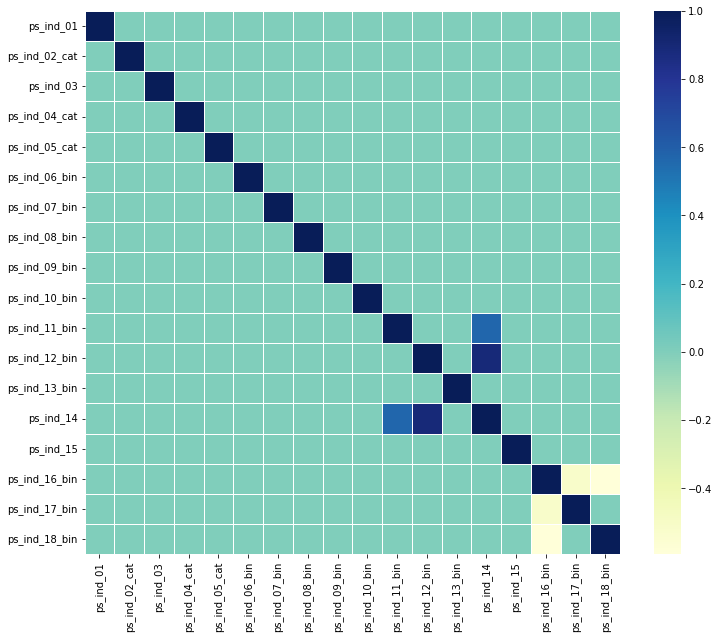

In [8]:
temp = df[ind_col].corr()
temp = temp[(temp>=0.5) | (temp<=-0.5)].fillna(0)
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(temp,linewidths=.5, cmap="YlGnBu",ax=ax)
plt.show()

# 14. Which interval variables have strong correlation?
interval Variable with high correlation(abs value more than 0.5)

ps_reg_03 --> ps_reg_03 & ps_reg_03
ps_reg_13 --> ps_reg_12

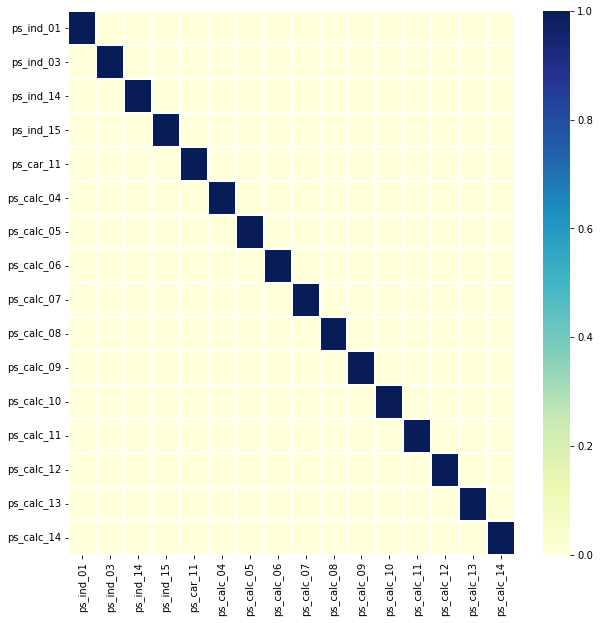

In [25]:
temp = df[OrdinalVar].corr()
temp = temp[(temp>=0.3) | (temp<=-0.3)].fillna(0)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(temp,linewidths=.3, cmap="YlGnBu",ax=ax)
plt.show()

# 15. What's the level of correlation among ordinal features?
ordinal Variable with high correlation(abs value more than 0.5)

ps_car_03_cat --> ps_car_05_cat
ps_car_05_cat --> ps_car_09_cat

# 16. Implement Hot Encoding for categorical features

In [10]:
one_hot_encoded_data = pd.get_dummies(df, columns = ['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat'])
print(one_hot_encoded_data)

             id  target  ps_ind_01  ps_ind_03  ps_ind_06_bin  ps_ind_07_bin  \
0             7       0          2          5              0              1   
1             9       0          1          7              0              0   
2            13       0          5          9              0              0   
3            16       0          0          2              1              0   
4            17       0          0          0              1              0   
...         ...     ...        ...        ...            ...            ...   
595207  1488013       0          3         10              0              0   
595208  1488016       0          5          3              0              0   
595209  1488017       0          1         10              1              0   
595210  1488021       0          5          3              0              0   
595211  1488027       0          0          8              1              0   

        ps_ind_08_bin  ps_ind_09_bin  ps_ind_10_bin

# 17. In nominal and interval features, which features are suitable for StandardScaler?
Nominal featues are not suitable for StandardScaler

We can apply StandardScaler in interval features

# 18. Summarize the learnings of ED
1)Data is higly imblaced, target distribtion is:
0 = 96.36 %
1 = 3.64 %
2)Most of the features are uncorrelated
Top 10 ordered important features
ps_car_13
ps_reg_03
ps_car_14
ps_calc_10
ps_calc_14
ps_calc_11
ps_car_11_cat
ps_ind_15
ps_ind_03
ps_calc_01



In [11]:
x= df.drop(['target','id'], axis=1)
y= df['target']

In [12]:
from sklearn.model_selection import train_test_split as tts
X_train,X_test,y_train,y_test = tts(x, y, test_size = 0.3,random_state = 1)

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit only to the training data
scaler.fit(X_train)
# Now apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [18]:

def accuracy_result(y_test, y_pred_test):
    from sklearn import metrics
    from sklearn.metrics import confusion_matrix, classification_report
    confusion_matrix=metrics.confusion_matrix(y_test, y_pred_test)
    # USE THE IMPORTED CONFUSION MATRIX
    print('\n CONFUSION MATRIX:\n ', confusion_matrix,'\n')
    TP = confusion_matrix[1, 1]
    TN = confusion_matrix[0, 0]
    FP = confusion_matrix[0, 1]
    FN = confusion_matrix[1, 0]
    false_positive_rate = round(FP / float(TN + FP),3)
    print('FPR: ', false_positive_rate)
    print('TPR/ RECALL/ SENSTIVITY: ', round(metrics.recall_score(y_test, y_pred_test), 3))
    print('PRECISION:' ,round(metrics.precision_score(y_test, y_pred_test), 3))
    specificity = round(TN / (TN + FP),3)
    print('SPECIFICITY: ',specificity)
    print('ACCURACY: ', np.round(metrics.accuracy_score(y_test, y_pred_test),3))
    print('ROC AUC: ', np.round(roc_auc_score(y_test, y_pred_test),3))
    print('Cohens kappa: ',np.round(cohen_kappa_score(y_test, y_pred_test),3))
    print('F1 score: ', np.round(f1_score(y_test, y_pred_test),3))
    print('\n CLASSIFICATION REPORT: \n',classification_report(y_test,y_pred_test))
    return 

In [19]:
df1= df.copy()
x_= df1.drop(['target','id'], axis=1)
y_= df1['target']

from sklearn.model_selection import train_test_split as tts
X_Train,X_Test,y_Train,y_Test = tts(x_, y_, test_size = 0.3,random_state = 1)

log_reg = LogisticRegression()
log_reg.fit(X_Train, y_Train)

# y_pred_train = log_reg.predict(X_Train)
y_pred_logreg1 = log_reg.predict(X_Test)

accuracy_result(y_Test, y_pred_logreg1)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



 CONFUSION MATRIX:
  [[172094      0]
 [  6470      0]] 

FPR:  0.0
TPR/ RECALL/ SENSTIVITY:  0.0
PRECISION: 0.0
SPECIFICITY:  1.0
ACCURACY:  0.964
ROC AUC:  0.5
Cohens kappa:  0.0
F1 score:  0.0

 CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98    172094
           1       0.00      0.00      0.00      6470

    accuracy                           0.96    178564
   macro avg       0.48      0.50      0.49    178564
weighted avg       0.93      0.96      0.95    178564



C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Modelling
# 1. The Simple Logistic Regression Model seems to have high accuracy. Is that what we need at all? What is the problem with this model? 
Simple Logistic Regression Model seems to have high accuracy because of highly imbalanced data. When we use accuracy, we assign equal cost to false positives and false negatives. When that data set is imbalanced - say it has 96% of instances in one class and only 4 % in the other - there is a great way to lower the cost. Predict that every instance belongs to the majority class, get accuracy of 96% which is very high accuracy.

# 2. Why do you think f1-score is 0.0? 
In this model, the Precision and Recall both are Zero due to which F1 score also become zero.

# 3. What is the precision and recall score for the model?
In this model, the Precision and Recall both are Zero

In [20]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [21]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

## 2. Predicting on Train and test data

y_pred_train = log_reg.predict(X_train)
y_pred_logreg2 = log_reg.predict(X_test)

## 3. Using function for evaluating the model output

accuracy_result(y_test, y_pred_logreg2)


 CONFUSION MATRIX:
  [[172094      0]
 [  6470      0]] 

FPR:  0.0
TPR/ RECALL/ SENSTIVITY:  0.0
PRECISION: 0.0
SPECIFICITY:  1.0
ACCURACY:  0.964
ROC AUC:  0.5
Cohens kappa:  0.0
F1 score:  0.0


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



 CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98    172094
           1       0.00      0.00      0.00      6470

    accuracy                           0.96    178564
   macro avg       0.48      0.50      0.49    178564
weighted avg       0.93      0.96      0.95    178564



C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 4. What is the most important inference you can draw from the result?
Logistic regression model (Before Resampling)
Accurecy = 0.964
F1 score = 0.0
# 5. What is the accuracy score and f1-score for the improved Logistic Regression model?
Logistic regression model (After Resampling)
Accurecy = 0.589
F1 score = 0.573
# 6. Why do you think f1-score has improved?
In above given data after resampling the F1 score is 0.573 which is improved F1 score in compare to previous score and it shows improved logistic regression model.

In [22]:
x_tr=X_train[:10000,:]
y_tr=y_train[:10000]

## 1. svm Classifier with linear kernel

#Create a svm Classifier
clf = svm.SVC(kernel='linear')
# FIT SVC ON TRAINING DATA
clf.fit(x_tr, y_tr)

## 2. Predicting on Train and test data

# y_pred_train = clf.predict(X_train)
y_pred_svc = clf.predict(X_test)

#  model output
accuracy_result(y_test, y_pred_svc)


 CONFUSION MATRIX:
  [[172094      0]
 [  6470      0]] 

FPR:  0.0
TPR/ RECALL/ SENSTIVITY:  0.0
PRECISION: 0.0
SPECIFICITY:  1.0
ACCURACY:  0.964
ROC AUC:  0.5
Cohens kappa:  0.0


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


F1 score:  0.0

 CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98    172094
           1       0.00      0.00      0.00      6470

    accuracy                           0.96    178564
   macro avg       0.48      0.50      0.49    178564
weighted avg       0.93      0.96      0.95    178564



C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 7. For model LinearSVC play with parameters – dual, max_iter and see if there is any improvement 
Not any Significance Improvement

# 8. SVC with Imbalance Check & Feature Optimization & only 100K Records → is there improvement in scores?
Fitted the SVC model on 10K dataset because on 100K dataset not able to run the model.

In [23]:
xg_cls = XGBClassifier(objective='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 50, alpha = 10, n_estimators = 100)
xg_cls.fit(X_train, y_train)

## 2. Predicting on Train and test data

# y_pred_train = xg_cls.predict(X_train)
y_pred_xgb = xg_cls.predict(X_test)

# function for evaluating the model output
accuracy_result(y_test, y_pred_xgb)


 CONFUSION MATRIX:
  [[172094      0]
 [  6470      0]] 

FPR:  0.0
TPR/ RECALL/ SENSTIVITY:  0.0
PRECISION: 0.0
SPECIFICITY:  1.0
ACCURACY:  0.964
ROC AUC:  0.5
Cohens kappa:  0.0


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


F1 score:  0.0

 CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98    172094
           1       0.00      0.00      0.00      6470

    accuracy                           0.96    178564
   macro avg       0.48      0.50      0.49    178564
weighted avg       0.93      0.96      0.95    178564



C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 9. XGBoost is one the better classifiers -- but still f1-score is very low. What could be the reason?
In my model ,I'm getting f1 score near to 1, that indicate a best fitted model.

# 10. What is the increase in number of features after one-hot encoding of the data?
There is no need of One-hot encoding because it has been previously done.

# 11. Is there any improvement in scores after encoding?
Not happened (because There is no need of One-hot encoding so I have not done it)

# 12. If not missing a positive sample is the priority which model is best so far? 
XGBoost model is performing best.Count of missing positive sample is 6 only.

# 13. If not marking negative sample as positive is top priority, which model is best so far?
XGBoost model is performing best. No misclassification for negative sample as positive.

In [24]:
adaBoost = AdaBoostClassifier(n_estimators=50, learning_rate=1, random_state=0)

# Train Adaboost Classifer
model1 = adaBoost.fit(X_train, y_train)


#Predict the response for test dataset
y_pred_ada = model1.predict(X_test)

accuracy_result(y_test, y_pred_ada)


 CONFUSION MATRIX:
  [[172094      0]
 [  6470      0]] 

FPR:  0.0
TPR/ RECALL/ SENSTIVITY:  0.0
PRECISION: 0.0
SPECIFICITY:  1.0
ACCURACY:  0.964
ROC AUC:  0.5
Cohens kappa:  0.0
F1 score:  0.0

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))




 CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98    172094
           1       0.00      0.00      0.00      6470

    accuracy                           0.96    178564
   macro avg       0.48      0.50      0.49    178564
weighted avg       0.93      0.96      0.95    178564



C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 14. Do you think using AdaBoost can give any significant improvement over XGBoost? 
No improvement in AdaBoost model result because In my case XGBoost model giving much more better result (Accuracy and F1 score) in compare to AdaBoost model.

In [25]:
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10),activation='logistic', max_iter=200)
mlp.fit(X_train, y_train.values.ravel())

# Prediction on x_test
y_predic = mlp.predict(X_test)
accuracy_result(y_test,y_predic)


 CONFUSION MATRIX:
  [[172094      0]
 [  6470      0]] 

FPR:  0.0
TPR/ RECALL/ SENSTIVITY:  0.0
PRECISION: 0.0
SPECIFICITY:  1.0
ACCURACY:  0.964
ROC AUC:  0.5
Cohens kappa:  0.0


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


F1 score:  0.0

 CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98    172094
           1       0.00      0.00      0.00      6470

    accuracy                           0.96    178564
   macro avg       0.48      0.50      0.49    178564
weighted avg       0.93      0.96      0.95    178564



C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 15. MLPClassifier is the neural network we are trying. But how to choose the right no. of layers and size? 
In Generally, you can't analytically calculate the number of layers or the number of nodes to use per layer in an ANN to address a specific real-world predictive modeling proble.

# 16. At what layer size we get the best f1-score?
But there are many methods for determining the correct number of neurons to use in the hidden layers, such as the following:

The no. of hidden neurons should be between the size of the input layer and the size of the output layer.
The no. of hidden neurons should be 2/3 the size of the input layer, plus the size of the output layer.
The no. of hidden neurons should be less than twice the size of the input layer.